In [2]:
bids_folder = '/data/ds-tmsrisk/'
import os.path as op
import arviz as az

from tms_risk.cogmodels.fit_model import build_model, get_data
import pymc as pm
from tqdm.notebook import tqdm

from tms_risk.cogmodels.utils import plot_ppc

In [3]:
!mkdir -p /data/ds-tmsrisk/derivatives/figures/pmc_models

  0%|          | 0/5 [00:00<?, ?it/s]

Output()

Output()

Output()

Output()

Output()

/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


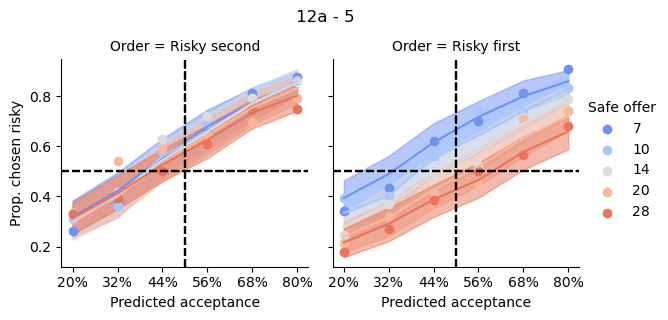

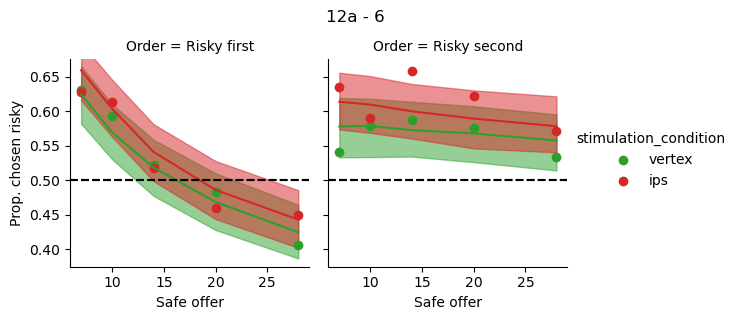

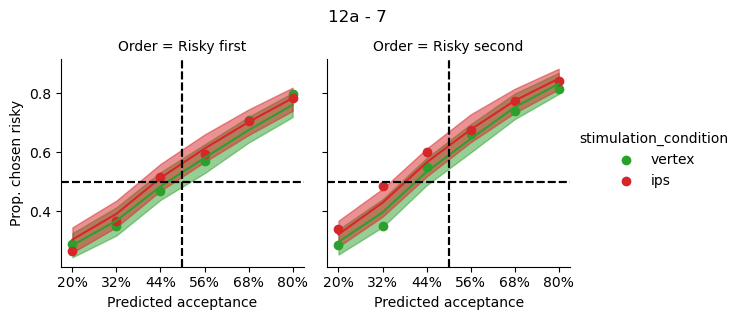

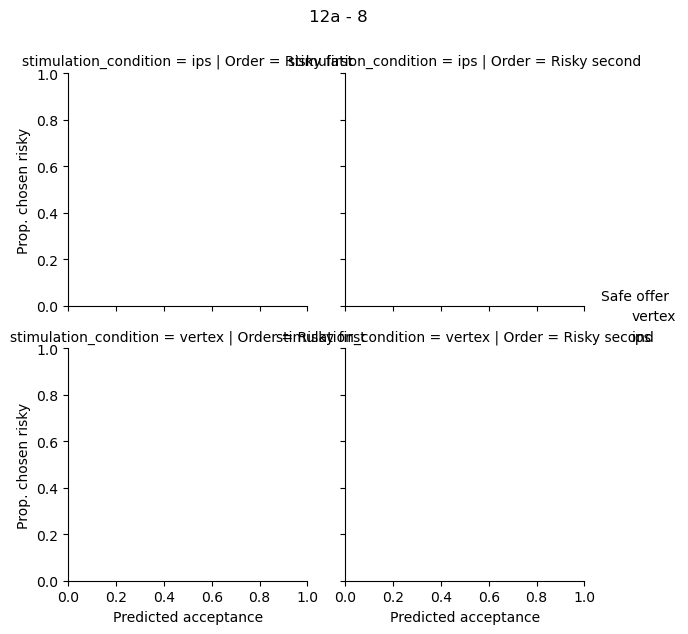

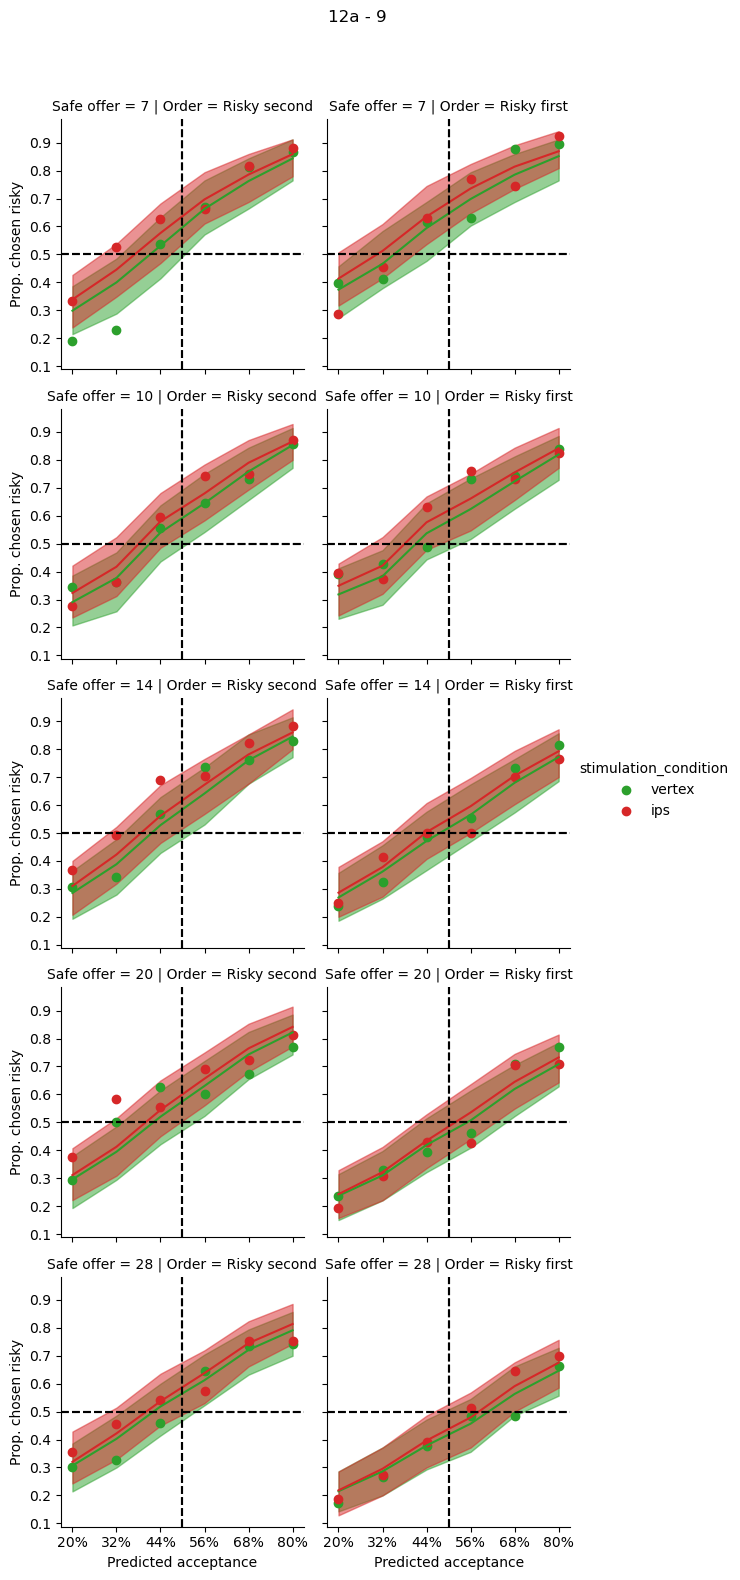

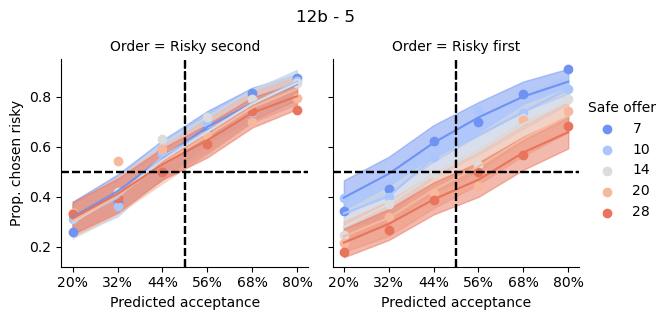

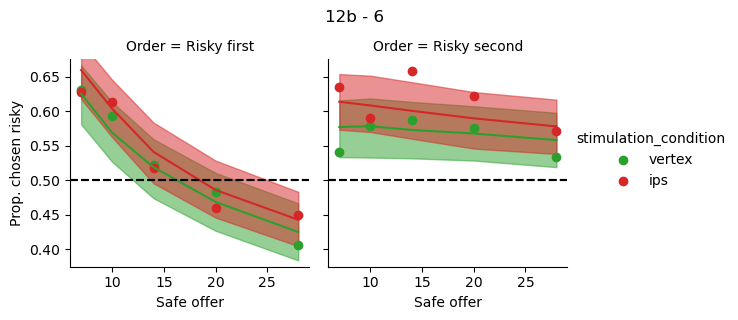

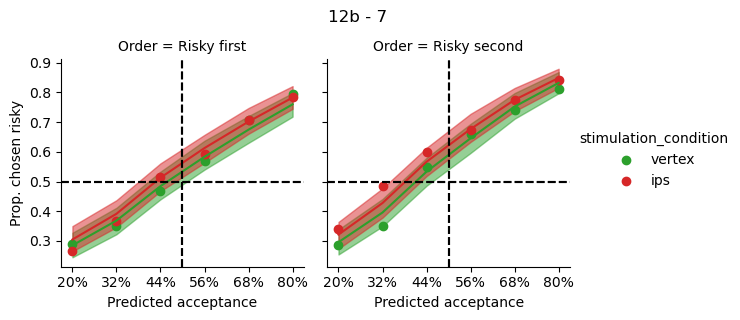

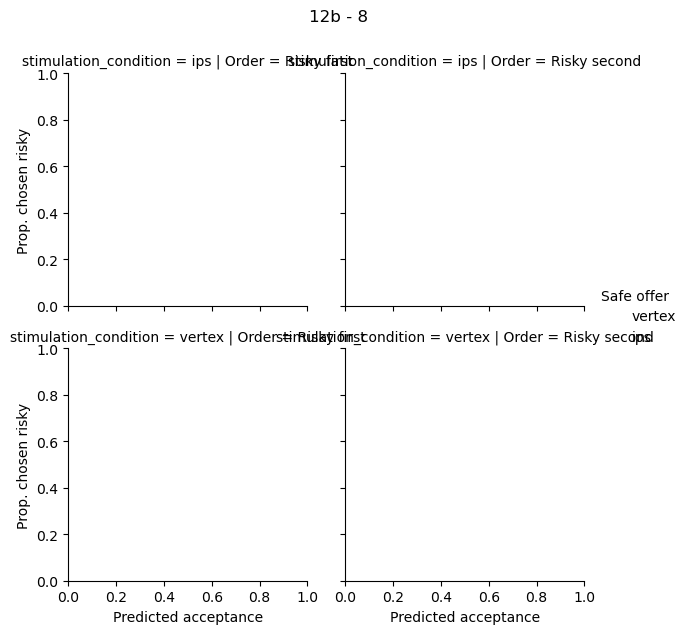

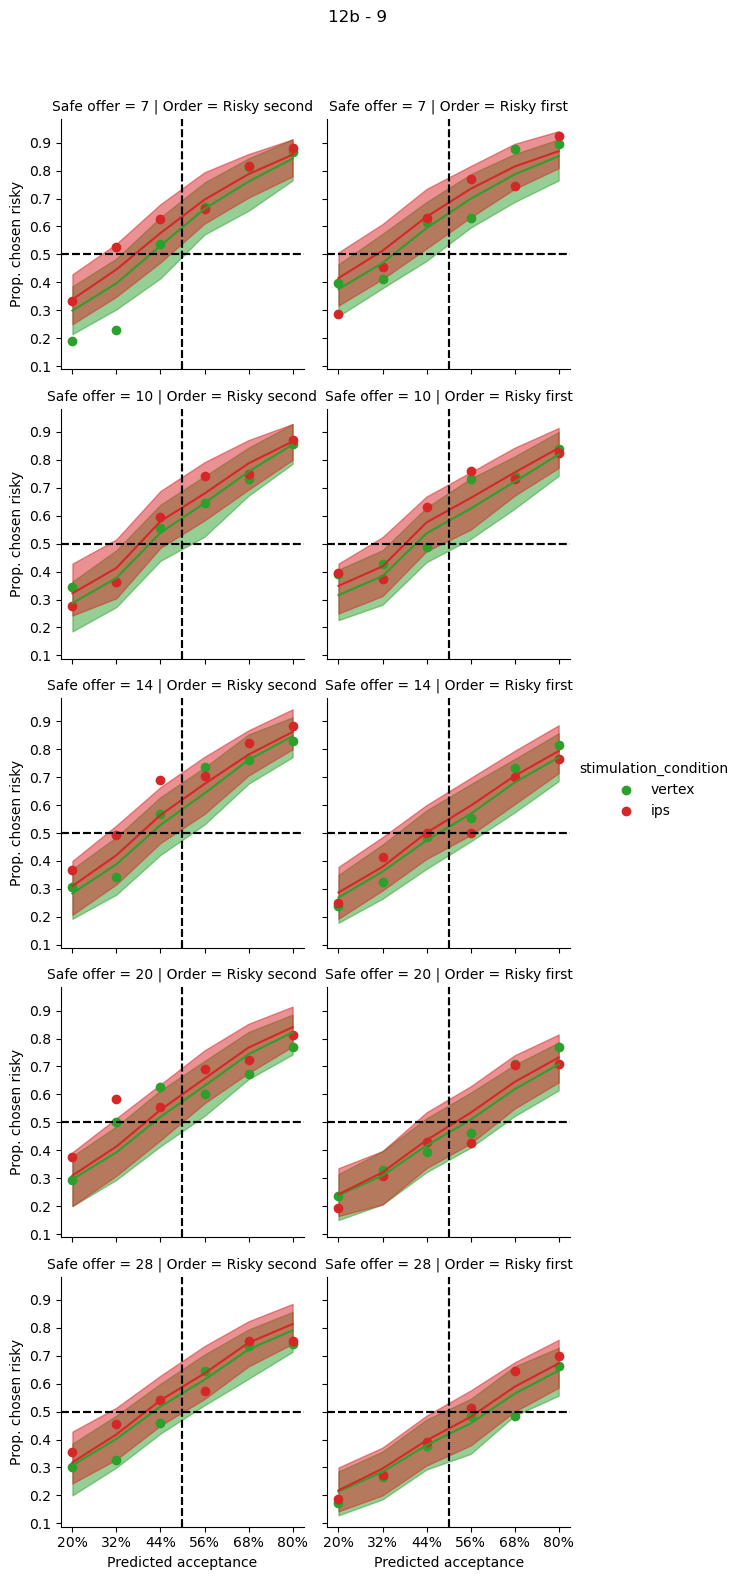

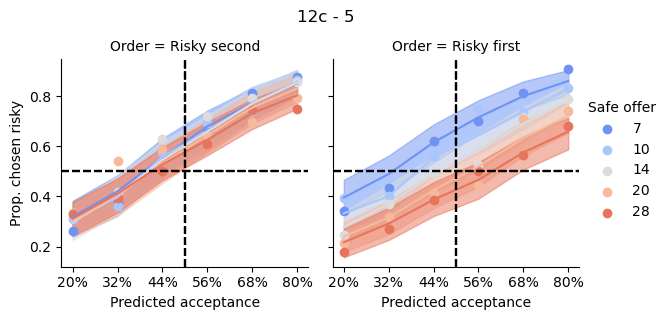

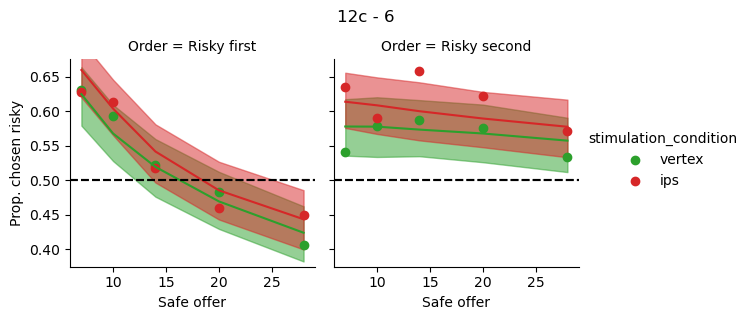

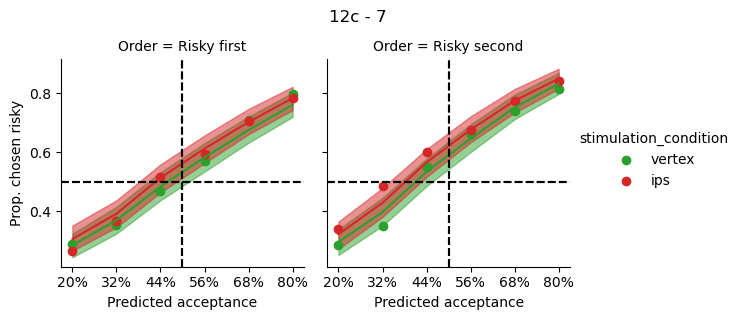

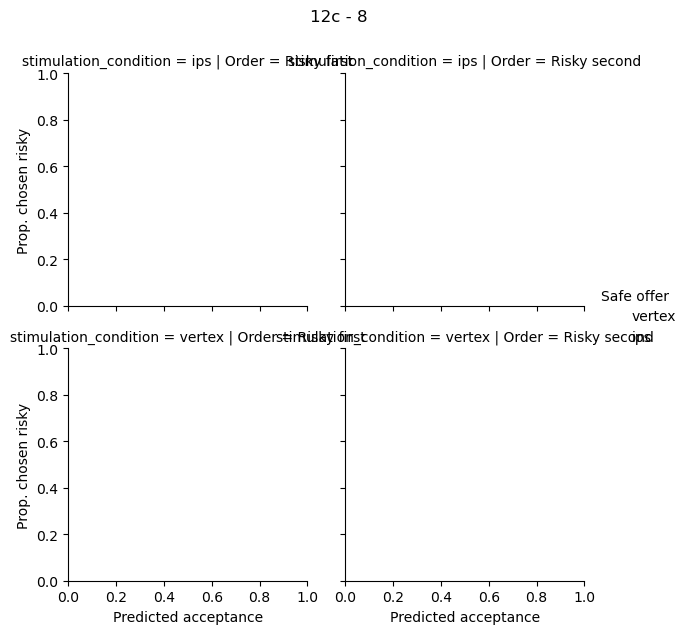

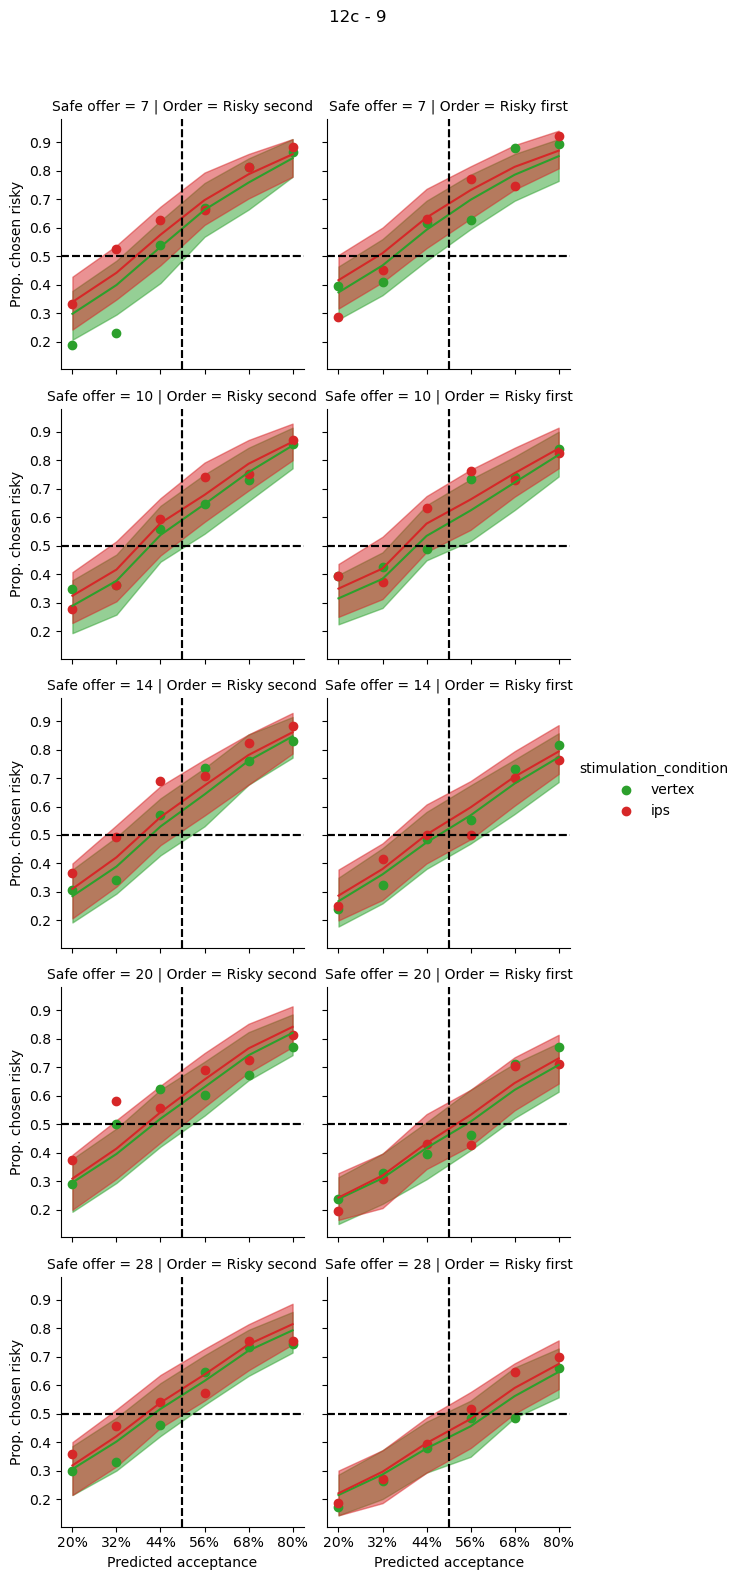

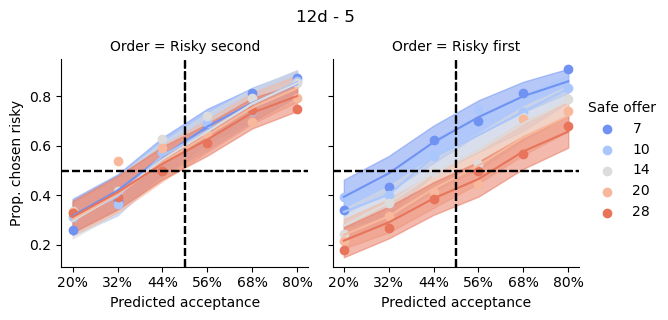

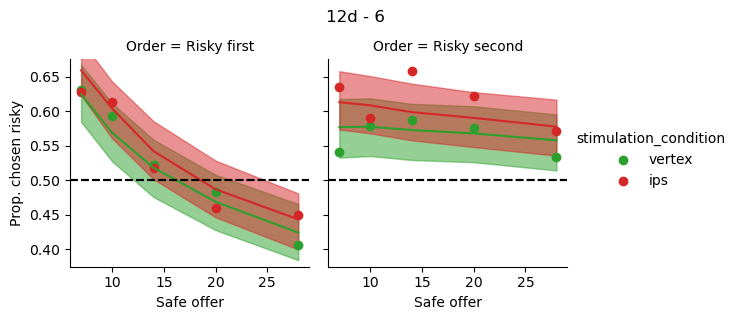

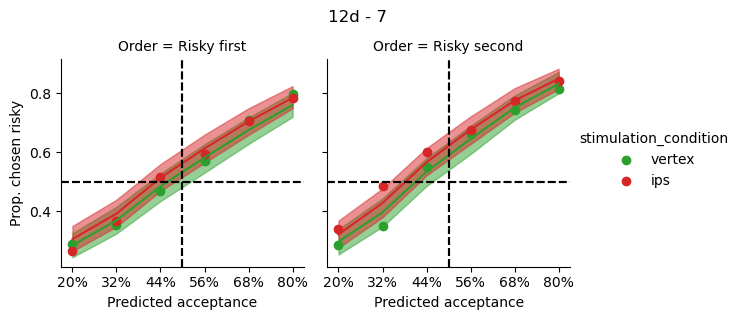

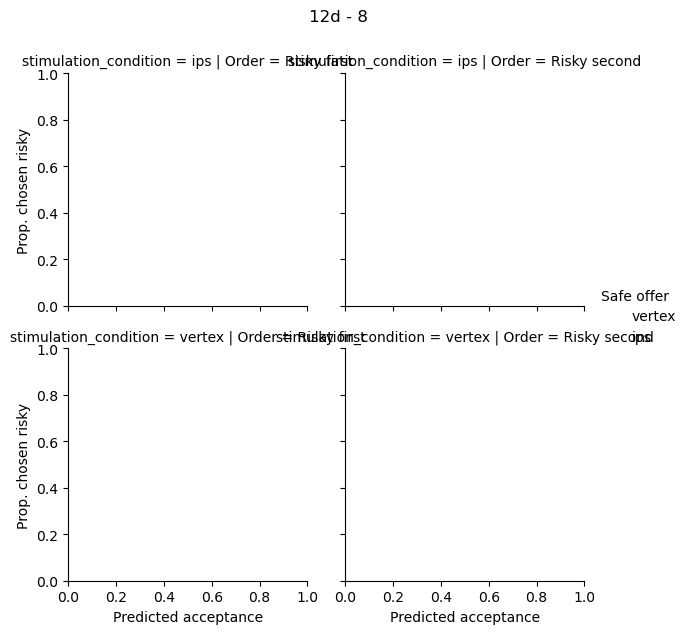

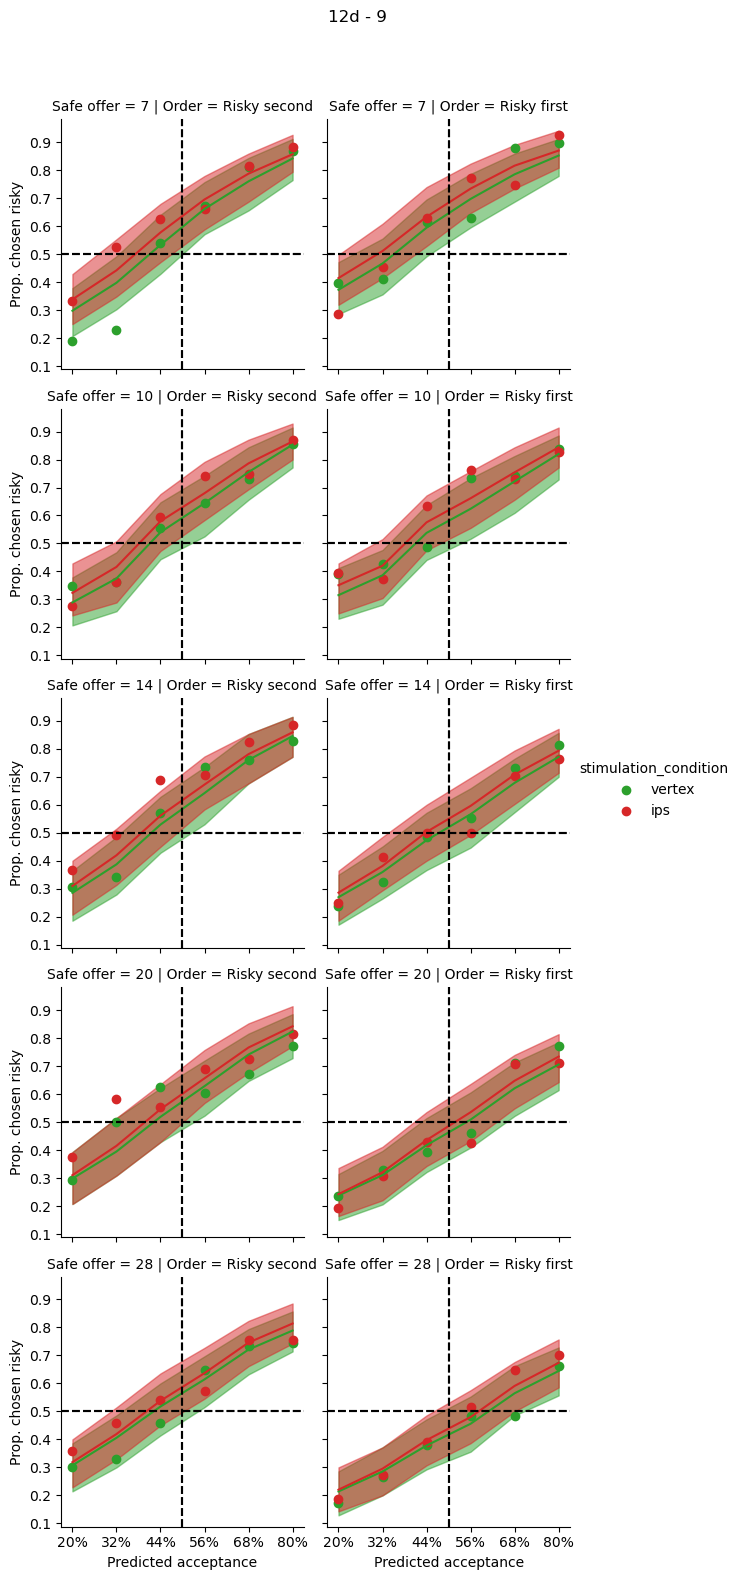

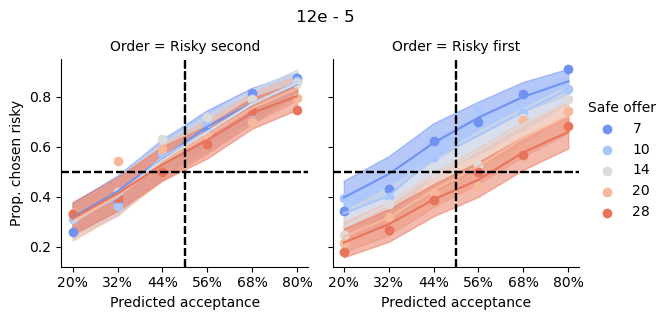

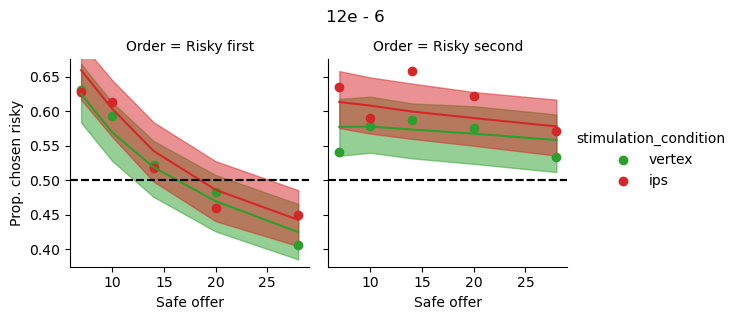

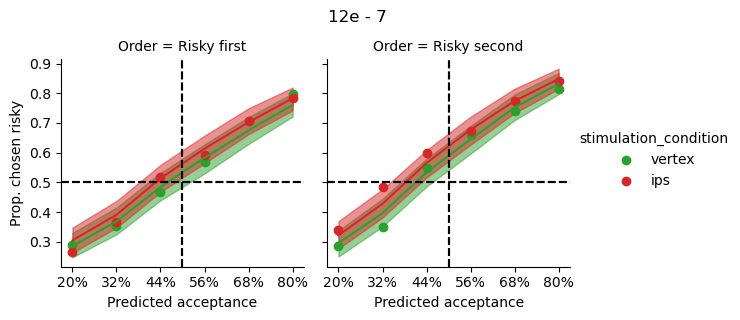

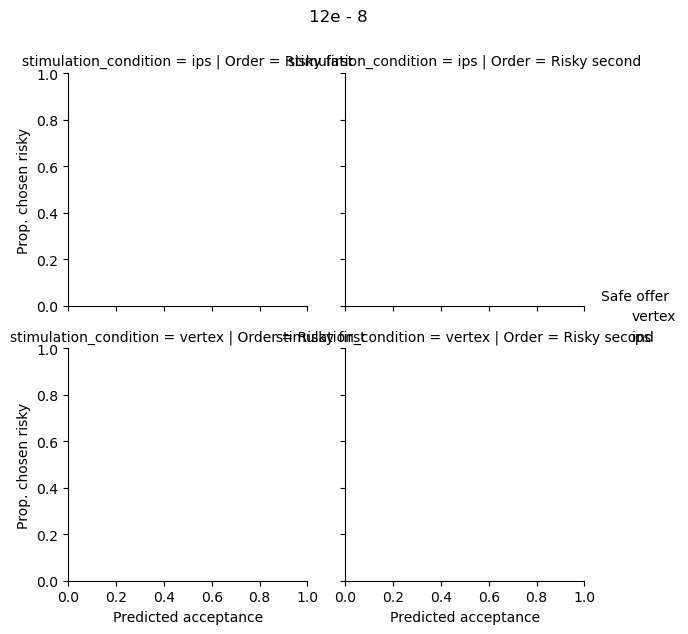

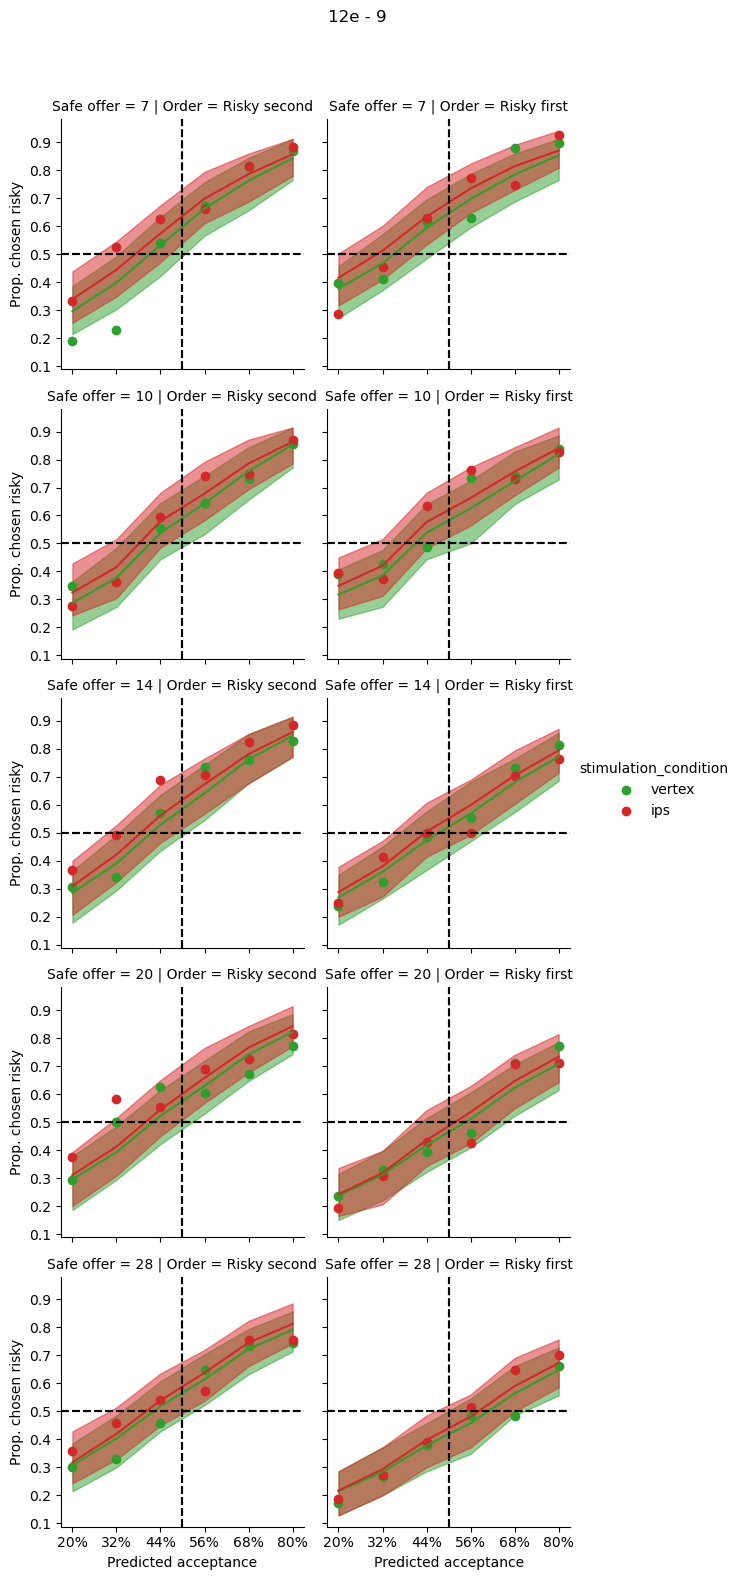

In [4]:
dfs = []
models = []
idatas = []

model_labels  = ['10_null', '10a', '10b', '10c', '11_null', '11a', '11b', '11c']
model_labels = ['12a', '12b', '12c', '12d', '12e']

for model_label in tqdm(model_labels):
    dfs.append(get_data(model_label=model_label))

    model = build_model(model_label, dfs[-1])
    idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf')).sel(draw=slice(None, None, 10))

    model.build_estimation_model()

    # with model.estimation_model:
    #     pm.compute_log_likelihood(idata)

    models.append(model)
    idatas.append(idata)

    ppc = models[0].ppc(dfs[0], idatas[0])

    ix_risky_first = ppc.index.get_level_values('risky_first')
    ppc.loc[ix_risky_first] = 1- ppc.loc[ix_risky_first] 

    for plot in [5,6,7, 8, 9]:
        g = plot_ppc(dfs[-1], ppc, plot_type=plot, level='group') 
        g.fig.suptitle(f'{model_label} - {plot}', y=1.05)

        g.savefig(op.join(bids_folder, 'derivatives', 'figures', 'pmc_models', f'{model_label}_plot{plot}.pdf'))


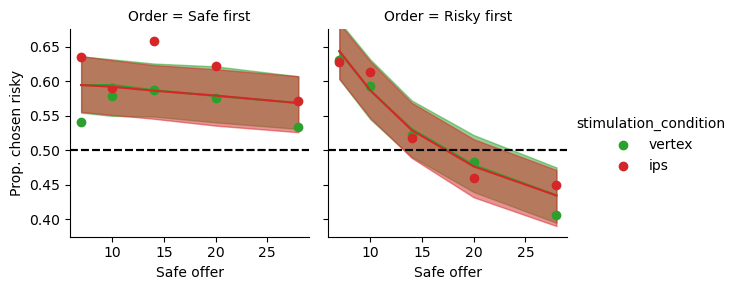

In [24]:

plot_ppc(dfs[0], ppc, plot_type=6, level='group')